In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [30]:
drug_sets = {}
for i in glob("output/*.dmt"):
    with open(i) as o:
        lib = i.replace("output/", "").replace(".dmt", "")
        if not lib == "resources":
            if lib == "Schaefer_2015":
                lib = "Schaefer et al. 2015"
                pass
            if lib == "FDA":
                pass
            else:
                drug_sets[lib] = set()
                for line in o:
                    drugs = line.strip().split("\t")[2:]
                    for drug in drugs:
                        drug_sets[lib].add(drug)


In [31]:
drug_sets.keys()

dict_keys(['DrugCentral', 'Schaefer et al. 2015', 'Drugshot', 'FAERS', 'National_Birth_Defects_Registry'])

In [32]:
pmid = "De Santis et. al. 2004"
title = "Risk of drug-induced congenital defects"
drug_set = [
    # "ACE inhibitor",
    # "angiotensin II inhibitors",
    "aminoglycoside",
    "streptomycin",
    "kanamycin",
    "tetracycline",
    "carbamazepine",
    "valproic acid",
    "phenobarbital",
    "barbiturate",
    "trimethadione",
    "paramethadione",
    "benzodiazepine",
    "aminoptherine",
    "busulfan",
    "cyclophosphamide",
    "coumarin",
    "diethylstilbestrol",
    "ergotamine",
    # "NSAD",
    "iodine",
    "lithium",
    "methimazole",
    "misoprostol",
    "penicillamine",
    "retinoid",
    "isotretinoin",
    "etretinate",
    "vitamin A",
    "thalidomide"
]

drug_sets[pmid] = drug_set

In [33]:
pmid = "Dawson et. al. 2014"
title = "Maternal exposure to methotrexate and birth defects: a population-based study"
drug_set = [
    "methotrexate"
]
drug_sets[pmid] = drug_set

In [34]:
pmid = "Schaefer 2011"
drug_set = [
    "phenprocoumon",
    "acenocoumarol",
    "fluindione",
    "warfarin",
    "phenindione",
    "isotretinoin",
    "thalidomide",
    "ACE inhibitor",
    "angiotensin II inhibitors", 
]
drug_sets[pmid] = drug_set

In [35]:
pmid = "Tinker et. al. 2015"
drug_set = [
    "mycophenolate mofetil"
]

drug_sets[pmid] = drug_set

In [36]:
teratogen_df = pd.read_csv("../data/teratogen.tsv", sep="\t", index_col = 0)
teratogen_df.head()

,Year of FDA approval,TERIS risk rating,Quality of Data,FDA Category,Unnamed: 5,Unnamed: 6
Drug,,,,,,
Abarelix,2003.0,Undetermined,None,X,NaN,NaN
Acamprosate,2004.0,Undetermined,None,C,NaN,NaN
Adefovir,2002.0,Undetermined,Very Limited,C,NaN,NaN
Alcaftadine,2010.0,Undetermined,None,B,NaN,NaN
Alfuzosin,2003.0,Undetermined,None,B,NaN,NaN


In [37]:
teratogen_df = teratogen_df[(teratogen_df["FDA Category"] == 'X') | (teratogen_df["FDA Category"] == 'D')]
teratogen_df.head()

,Year of FDA approval,TERIS risk rating,Quality of Data,FDA Category,Unnamed: 5,Unnamed: 6
Drug,,,,,,
Abarelix,2003.0,Undetermined,None,X,NaN,NaN
Aliskiren,2007.0,Undetermined,None,D,NaN,NaN
Ambrisentan,2007.0,Undetermined,None,X,NaN,NaN
Azacitidine,2004.0,Undetermined*,Limited-Fair,D,NaN,NaN
Bendamustine,2008.0,Undetermined*,None,D,NaN,NaN


In [38]:
tera_drugs = [i.lower().strip() for i in teratogen_df.index]
len(tera_drugs)

41

In [39]:
pmid = "Friedman et. al. 2011"
drug_set = tera_drugs
drug_sets[pmid] = drug_set

In [40]:
mapped_drugs = pd.read_csv('../data/mappings.tsv', sep="\t", index_col=0)
mapped_drugs.head()

,label,raw_drug,drugbank,placenta,D_X,chembl,drugs.com,lincs_drug_meta,lincs_sm_meta,lincs_matrix,not_mapped,structure
0,SBD D & X,acetohydroxamic acid,Acetohydroxamic acid (DB00551),CID:1990,acetohydroxamic acid,CHEMBL734,Acetohydroxamic acid,NaN,NaN,NaN,NaN,NaN
1,SBD D & X,Acitretin,Acitretin (DB00459),CID:5284513,acitretin,CHEMBL1131,Acitretin,brd-k62012036,brd-k62012036,acitretin,NaN,NaN
2,SBD D & X,Alprazolam,Alprazolam (DB00404),NaN,alprazolam,CHEMBL661,Alprazolam,brd-k32398298,brd-k32398298,alprazolam,NaN,NaN
3,SBD D & X,Amikacin Sulfate,Amikacin (DB00479),CID:37768,amikacin,CHEMBL4208954,Amikacin,brd-k88043978,brd-k88043978|brd-a30051119,amikacin,NaN,NaN
4,SBD D & X,Amiodarone Hydrochloride,Amiodarone (DB01118),CID:2157,amiodarone,CHEMBL633,Amiodarone,brd-k87555556,brd-k87555556,amiodarone,NaN,NaN


In [41]:
sets = {k: set(v['lincs_matrix']) for k,v in mapped_drugs[['label', 'lincs_matrix']].dropna().groupby('label') if k !='SBD D & X'}

In [42]:
drug_sets['FDA Category X'] = sets['Drugs.com X'] | sets['DrugCentral X']
# we consider X&D to be just X
drug_sets['FDA Category D'] = (sets['Drugs.com D'] | sets['DrugCentral D']) - drug_sets['FDA Category X']


In [43]:
import requests
import time

In [16]:
verified = {}


In [44]:

def verify_drug(name):
    if name not in verified:
        res = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/%s/property/title/JSON"%name)
        time.sleep(0.1)
        if not res.ok:
            verified[name] = name
        else:
            verified[name] = res.json()["PropertyTable"]["Properties"][0].get("Title", name)
    return verified[name]

In [45]:
mapped_drug_sets = {}
for k,v in drug_sets.items():
    mapped_drug_sets[k] = set()
    for i in tqdm(v):
         mapped_drug_sets[k].add(verify_drug(i))
    print(k, len(v), len(mapped_drug_sets[k]))

100%|██████████| 1364/1364 [00:00<00:00, 741738.71it/s]


DrugCentral 1364 1364


100%|██████████| 147/147 [00:00<00:00, 980226.85it/s]


Schaefer et al. 2015 147 147


100%|██████████| 374/374 [00:00<00:00, 1162838.91it/s]


Drugshot 374 374


100%|██████████| 135/135 [00:00<00:00, 566797.84it/s]


FAERS 135 135


100%|██████████| 141/141 [00:00<00:00, 934276.25it/s]


National_Birth_Defects_Registry 141 140


100%|██████████| 27/27 [00:00<00:00, 643444.36it/s]


De Santis et. al. 2004 27 26


100%|██████████| 1/1 [00:00<00:00, 24528.09it/s]


Dawson et. al. 2014 1 1


100%|██████████| 9/9 [00:00<00:00, 205156.17it/s]


Schaefer 2011 9 9


100%|██████████| 1/1 [00:00<00:00, 35544.95it/s]


Tinker et. al. 2015 1 1


100%|██████████| 41/41 [00:00<00:00, 577068.67it/s]


Friedman et. al. 2011 41 41


100%|██████████| 60/60 [00:00<00:00, 751218.63it/s]


FDA Category X 60 60


100%|██████████| 112/112 [00:00<00:00, 605363.46it/s]

FDA Category D 112 112


In [46]:
with open("output/resources.dmt", 'w') as o:
    for k,v in drug_sets.items():
        print(k, len(v))
        if len(v) > 1:
            row = [k, ''] + list(v)
            o.write("\t".join(row))
            o.write("\n")


DrugCentral 1364
Schaefer et al. 2015 147
Drugshot 374
FAERS 135
National_Birth_Defects_Registry 141
De Santis et. al. 2004 27
Dawson et. al. 2014 1
Schaefer 2011 9
Tinker et. al. 2015 1
Friedman et. al. 2011 41
FDA Category X 60
FDA Category D 112


In [47]:
for k,v in drug_sets.items():
        with open("venn/%s.tsv"%k, 'w') as o:
                row = list(v)
                o.write("\n".join(row))


In [48]:
from supervenn import supervenn

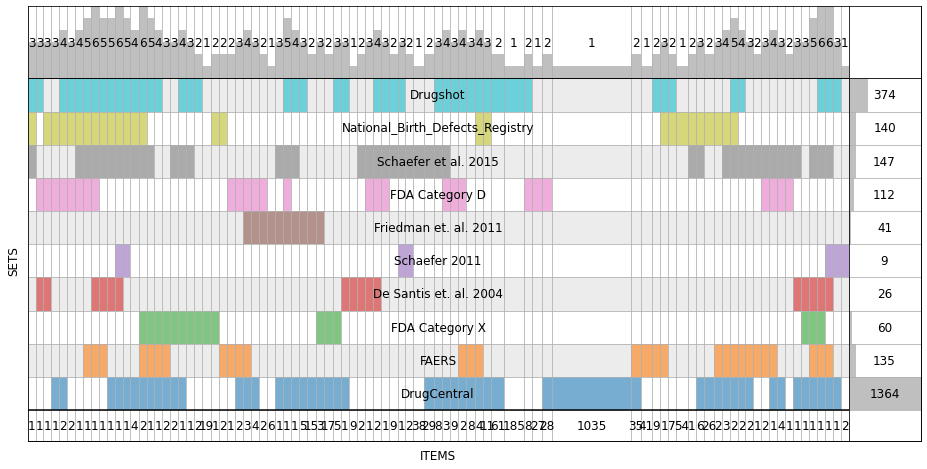

In [49]:
sets = []
labels = []
for k, v in mapped_drug_sets.items():
    if len(v) > 1:
        sets.append(v)
        labels.append(k)
plt.figure(figsize=(16, 8))
supervenn(sets, labels, sets_ordering= 'minimize gaps', widths_minmax_ratio=0.1 )
plt.savefig("supervenn.png", dpi=500)
plt.savefig("supervenn.svg", dpi=500)


In [20]:
from upsetplot import from_contents, plot

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

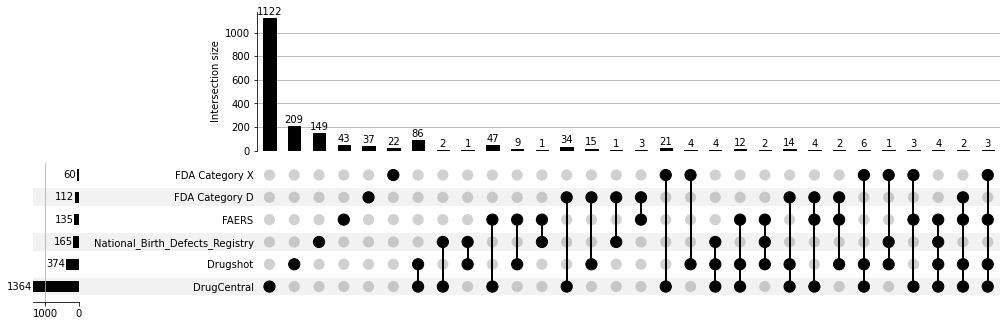

In [21]:
orient = "Horizontal"
color = "Black"
counts = True
percent = False
df = from_contents(drug_sets)
plot(df, orientation = orient.lower(), facecolor = color, show_counts = counts, show_percentages = percent)
    

In [26]:
a = {k: ", ".join(list(v)) for k,v in mapped_drug_sets.items() if len(v)>1}

In [27]:
df = pd.DataFrame.from_dict(a, orient='index', columns=["Drugs"])
df.index.name = "Resource"
df

,Drugs
Resource,
DrugCentral,"Gilteritinib, Isoetharine, Metopimazine, Pipot..."
Schaefer et al. 2015,"Meperidine, Prilocaine, adalimunab, Cyclophosp..."
Drugshot,"Levamisole, Succinylcholine, Camptothecin, Phe..."
FAERS,"Amlodipine, Propafenone, Prednisone, Oxybutyni..."
National_Birth_Defects_Registry,"Ammonium alginate, Meperidine, Nystatin, Diphe..."
De Santis et. al. 2004,"Kanamycin, aminoptherine, Cyclophosphamide, Ba..."
"Schaefer, 2011","Ethyl4-ethoxy-6-methylnicotinate, Acenocoumaro..."
Friedman et. al. 2011,"Zoledronic acid, Dasatinib, Everolimus, Pitava..."
FDA Category X,"Bazedoxifene, Tazarotene, Levonorgestrel, Meth..."


In [28]:
df.to_csv("drug_resources.tsv", sep="\t")

In [29]:
mapped_drug_sets.keys()

dict_keys(['DrugCentral', 'Schaefer et al. 2015', 'Drugshot', 'FAERS', 'National_Birth_Defects_Registry', 'De Santis et. al. 2004', 'Dawson et. al. 2014', 'Schaefer, 2011', 'Tinker et. al. 2015', 'Friedman et. al. 2011', 'FDA Category X', 'FDA Category D'])